In [26]:
from src.camera_pose_visualizer_2D import CameraPoseVisualizer
from src.CameraProcessing import read_camera_alignment_reference
from pathlib import Path
import json
import importlib
import sys

In [27]:
image_dir = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\synthetic_pipeline\blender_data\3cams_even_rot_y"

In [28]:
# load camera parameters
params_file_path = Path(image_dir) / "params.json"
with open(params_file_path, 'r') as file:
    params = json.load(file)
focuspoint = params["cam"]["focuspoint"]
focal_length = params["cam"]["focal_length"]*10**(-3)
sensor_width = params["cam"]["sensor_size"][0]*10**(-3)
aspect_ratio = params["cam"]["sensor_size"][0] / params["cam"]["sensor_size"][1]
rotation_axis = params["motion"]["e"]

In [29]:
cams = read_camera_alignment_reference(image_dir)

initialize camera pose visualizer 2D


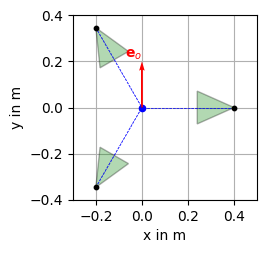

In [36]:
importlib.reload(sys.modules['src.camera_pose_visualizer_2D']) if 'src.camera_pose_visualizer_2D' in sys.modules else None
from src.camera_pose_visualizer_2D import CameraPoseVisualizer
# static scene    
visualizer = CameraPoseVisualizer([-0.3, 0.5], [-0.4, 0.4],figsize=(2.73,2.64))
visualizer.load_cameras(cams[0:3],focal_length,aspect_ratio,sensor_width,scale=10,alpha=0.3,select_color='g',cam_center = True, point_size = 10)
visualizer.add_focuspoint(focuspoint, color='blue', marker='o', size=20)
visualizer.draw_lines_to_focuspoint(cams,focuspoint, line_style='--', color='blue',linewidth = 0.5,alpha = 0.1)
visualizer.draw_rotation_axis(rotation_axis, length=0.2, color='red', width=0.01, alpha=1, fontsize = 10, label="$\mathbf{e}_o$")
visualizer.show()